# LunarLander using Actor-Critic Method : Assignment 3

**Professor**: Mudassar Liaq  
**Session**: Summer 2024  
**Deadline**: 11:50pm on 1st August 2024

## 1. Objective

The goal of this assignment is to implement and understand the Actor-Critic reinforcement learning algorithm to solve the **LunarLander-v2** environment from OpenAI Gymnasium.

## 2. Implementation

### 2.1 Setup and Environment Exploration

- Install the necessary libraries: `gymnasium`, `numpy`, `pytorch` on Jupyter Notebook.
- Explore the **LunarLander-v2** environment to understand the state and action spaces, and reward structure as shown in Figure 1.

### 2.2 Design the Actor and Critic Networks

- Implement two separate neural networks: one for the **actor** (policy network) and one for the **critic** (value network).
- Define the architecture of these networks (input layer, hidden layers, and output layer).

### 2.3 Policy and Value Estimation

- Implement the forward pass for both actor and critic networks.
- Ensure the actor network outputs a probability distribution over actions.
- Ensure the critic network outputs a scalar value representing the state value.

### 2.4 Training Loop

- Implement the training loop for the Actor-Critic algorithm.
- At each step, interact with the environment to obtain the state, action, reward, and next state.
- Compute the advantage estimate using the critic’s value function.
- Update the actor network using the policy gradient method.
- Update the critic network by minimizing the mean squared error of the value estimates.

### 2.5 Evaluation and Testing

- Evaluate the trained model by running several episodes and recording the performance.
- Plot the learning curve to show the improvement in cumulative rewards over time.
- Compare the performance with a baseline random policy.

---

![Figure 1: LunarLander-v2 environment from OpenAI Gymnasium](https://gymnasium.farama.org/_images/lunar_lander.png)

---

## 3. Submission

- Write a **report** detailing your implementation, including the architecture of your networks, training process, and results.
- Discuss any **challenges** faced during the implementation and how you overcame them.
- Provide suggestions for further **improvement** or exploration.
- Submit a single **PDF document** containing your report and a single **archive** containing all your source code.
- Organize your source code so that it is easy to follow and apparent how to run your solutions to the assignment's questions.
- You have to work on this assignment using **Jupyter Notebooks**. Any work done on **Google Colab** will be given **0 credit**.
- You strictly have to use **forward view** implementation of these algorithms. Any implementations of the **backward view** (i.e., with eligibility traces) will result in **0 credits**.

## Group Members

- Submit a single PDF document containing your plots.
- Name:Kishan Dayanand Nishad ID : 200612579
- Name:Dacorie Smith ID: 200555201
- Samarat Chapagin ID:200549449


### 2.1 Setup and Environment Exploration


In [ ]:
!pip install swig
!pip install gymnasium
!pip install "gymnasium[box2d]"
!pip install "gymnasium[box2d]"

In [3]:
# Import necessary libraries
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 2.1 Setup and Environment Exploration


In [6]:
# Environment setup and exploration
env = gym.make('LunarLander-v3')

# Retrieve the size of the state space (number of state features)
state_size = env.observation_space.shape[0]

# Retrieve the size of the action space (number of possible actions)
action_size = env.action_space.n

# Print out the state size to verify the number of input features
print(f"State size: {state_size}")

# Print out the action size to verify the number of possible actions
print(f"Action size: {action_size}")

# Set random seeds for reproducibility
# Set the random seed for PyTorch operations
torch.manual_seed(0)

# Set the random seed for NumPy operations
np.random.seed(0)

State size: 8
Action size: 4


### 2.2 Design the Actor and Critic Networks

- Implement two separate neural networks: one for the **actor** (policy network) and one for the **critic** (value network).
- Define the architecture of these networks (input layer, hidden layers, and output layer).


In [9]:
### 2.2 Design the Actor and Critic Networks

# Define the Actor Network as a subclass of nn.Module
class Actor(nn.Module):
    # Initialize the Actor with state size, action size, and hidden layer size
    def __init__(self, state_size, action_size, hidden_size=128):
        super(Actor, self).__init__()
        # Define the first fully connected layer mapping from state_size to hidden_size
        self.fc1 = nn.Linear(state_size, hidden_size)
        # Define the second fully connected layer mapping from hidden_size to hidden_size
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Define the output layer mapping from hidden_size to action_size
        self.action_head = nn.Linear(hidden_size, action_size)
    
    # Define the forward pass of the Actor Network
    def forward(self, x):
        # Apply ReLU activation to the output of the first layer
        x = torch.relu(self.fc1(x))
        # Apply ReLU activation to the output of the second layer
        x = torch.relu(self.fc2(x))
        # Apply softmax activation to get action probabilities
        action_probs = torch.softmax(self.action_head(x), dim=-1)
        # Return the action probabilities
        return action_probs

# Define the Critic Network as a subclass of nn.Module
class Critic(nn.Module):
    # Initialize the Critic with state size and hidden layer size
    def __init__(self, state_size, hidden_size=128):
        # Call the superclass constructor
        super(Critic, self).__init__()
        # Define the first fully connected layer mapping from state_size to hidden_size
        self.fc1 = nn.Linear(state_size, hidden_size)
        # Define the second fully connected layer mapping from hidden_size to hidden_size
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Define the output layer mapping from hidden_size to 1 (state value)
        self.state_value = nn.Linear(hidden_size, 1)
    
    # Define the forward pass of the Critic Network
    def forward(self, x):
        # Apply ReLU activation to the output of the first layer
        x = torch.relu(self.fc1(x))
        # Apply ReLU activation to the output of the second layer
        x = torch.relu(self.fc2(x))
        # Get the state value (no activation function needed)
        value = self.state_value(x)
        # Return the state value
        return value

 # For LunarLander environment:
# Set the state size to 8 (number of state features)
state_size = 8
# Set the action size to 4 (number of possible actions)
action_size = 4

# Define batch size for testing purposes
batch_size = 5  # You can choose any batch size for testing

# Generate a random test input tensor with shape (batch_size, state_size)
test_input = torch.randn(batch_size, state_size)

# Initialize the Actor network with the specified parameters
actor = Actor(state_size, action_size, hidden_size=128)
# Initialize the Critic network with the specified parameters
critic = Critic(state_size, hidden_size=128)

# Forward pass through the Actor network using the test input
action_probs = actor(test_input)
# Print the action probabilities output by the Actor
print("Action Probabilities:")
print(action_probs)

# Check if the sum of action probabilities is close to 1 for each instance (softmax property)
print("Sum of Action Probabilities (should be close to 1 for each instance):")
print(action_probs.sum(dim=1))

# Forward pass through the Critic network using the test input
state_values = critic(test_input)
# Print the state values output by the Critic
print("\nState Values:")
print(state_values)

# Validate that the output shape of the Actor matches (batch_size, action_size)
assert action_probs.shape == (batch_size, action_size), "Actor output shape mismatch"
# Validate that the output shape of the Critic matches (batch_size, 1)
assert state_values.shape == (batch_size, 1), "Critic output shape mismatch"

# Print a message indicating that the networks passed the tests
print("\nActor and Critic networks passed the tests!")


Action Probabilities:
tensor([[0.3488, 0.2041, 0.2449, 0.2021],
        [0.3502, 0.2002, 0.2415, 0.2081],
        [0.3459, 0.1867, 0.2495, 0.2179],
        [0.3203, 0.1998, 0.2612, 0.2187],
        [0.3183, 0.1961, 0.2677, 0.2179]], grad_fn=<SoftmaxBackward0>)
Sum of Action Probabilities (should be close to 1 for each instance):
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

State Values:
tensor([[0.2915],
        [0.1935],
        [0.0335],
        [0.0738],
        [0.2522]], grad_fn=<AddmmBackward0>)

Actor and Critic networks passed the tests!


### 2.3 Policy and Value Estimation 
### 2.4 Training Loop



Episode 0, Reward: -104.07512161244719
Episode 100, Reward: -22.738046163856538
Episode 200, Reward: -11.110893281872933
Episode 300, Reward: 251.42256595096703
Episode 400, Reward: 24.24900476344436
Episode 500, Reward: -34.97968690441719
Episode 600, Reward: -33.35635283619223
Episode 700, Reward: 171.061054666231
Episode 800, Reward: 174.3296490215382
Episode 900, Reward: 125.58457934367314
Episode 1000, Reward: 166.45502816336105
Episode 1100, Reward: -149.73151113147782
Episode 1200, Reward: -164.9927456898754
Episode 1300, Reward: 0.7597517739770296
Episode 1400, Reward: 178.32951775392632
Episode 1500, Reward: 193.88198203432773
Episode 1600, Reward: 183.34736772249158
Episode 1700, Reward: -179.57353151241176
Episode 1800, Reward: 151.23490679562047
Episode 1900, Reward: 25.364297342763294
Episode 2000, Reward: 261.04165541370116
Episode 2100, Reward: 244.11973346484254
Episode 2200, Reward: 261.1875433664118
Episode 2300, Reward: -49.8368826843672
Episode 2400, Reward: 258.201

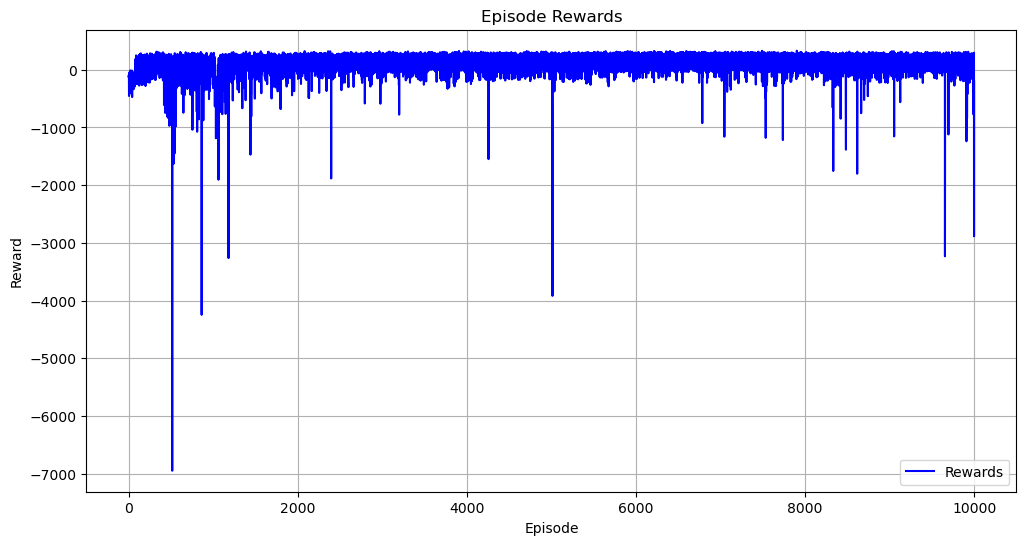

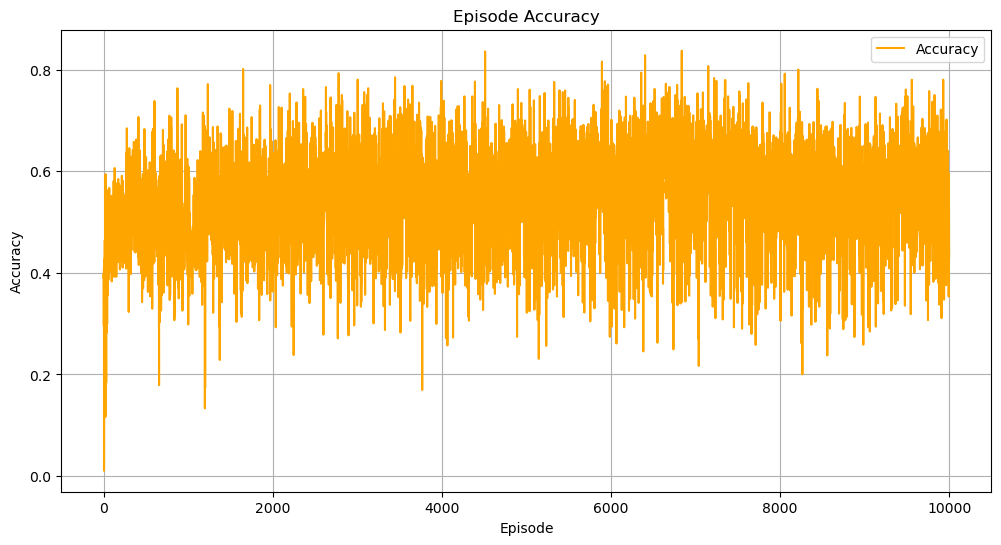

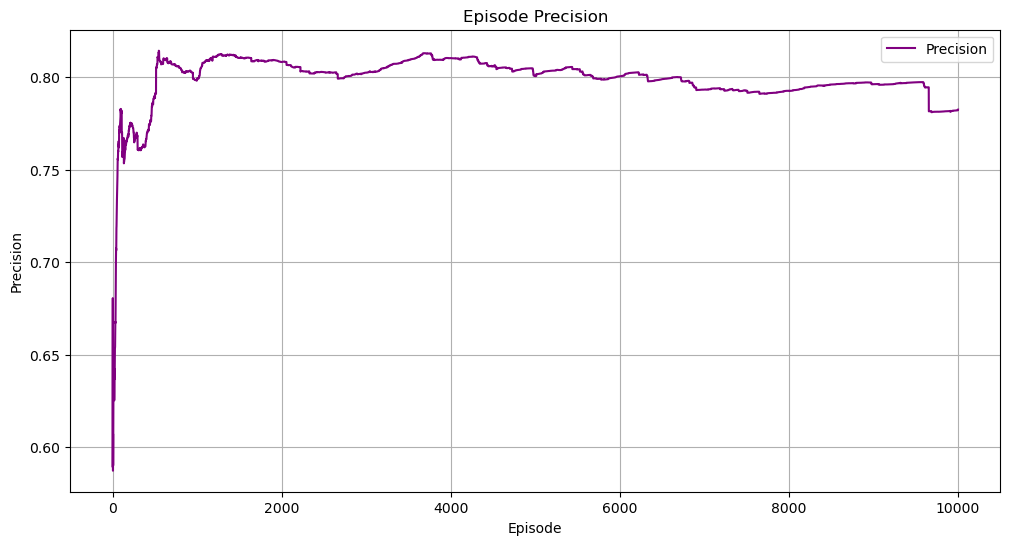

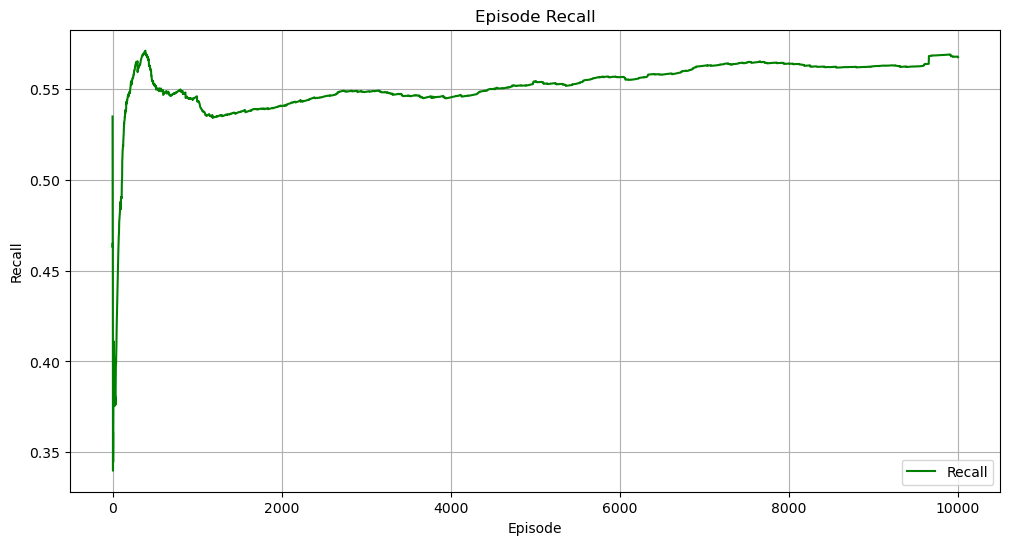

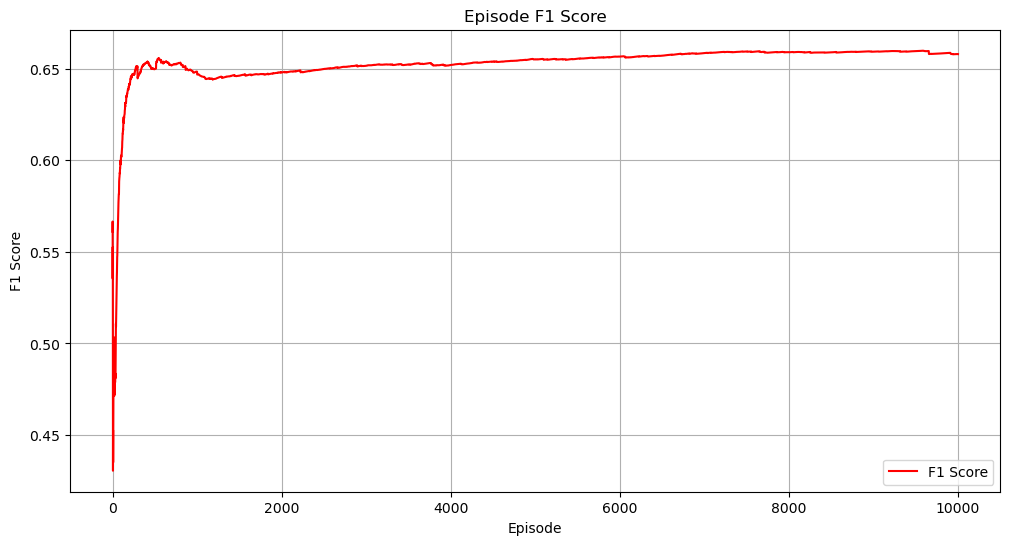

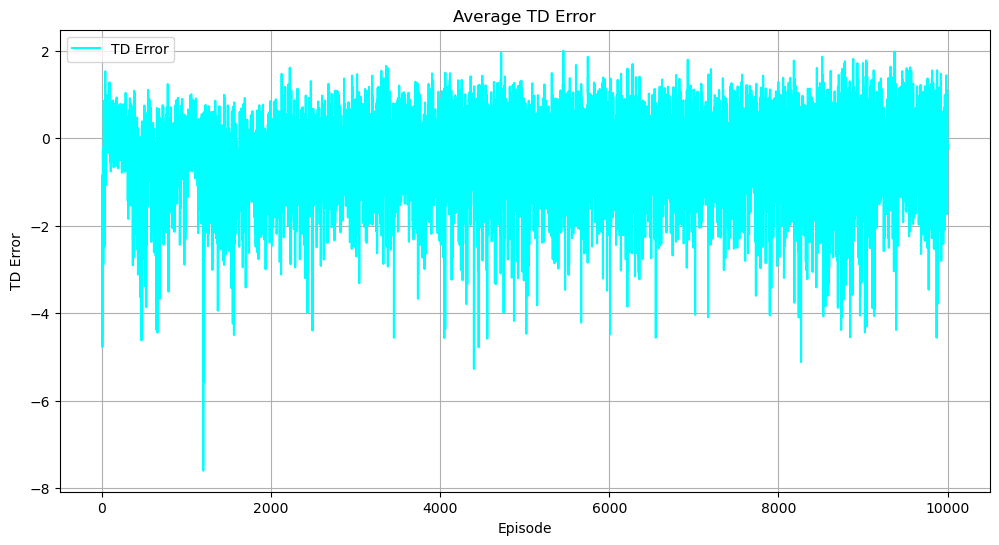

In [31]:
# Set the size of the hidden layers in the neural networks
hidden_size = 128

# Set the learning rate for the actor network optimizer
lr_actor = 1e-4

# Set the learning rate for the critic network optimizer
lr_critic = 5e-4

# Initialize the actor network with the specified state and action sizes and hidden layer size
actor = Actor(state_size, action_size, hidden_size)

# Initialize the critic network with the specified state size and hidden layer size
critic = Critic(state_size, hidden_size)

# Create an optimizer for the actor network using the Adam algorithm
optimizer_actor = optim.Adam(actor.parameters(), lr=lr_actor)

# Create an optimizer for the critic network using the Adam algorithm
optimizer_critic = optim.Adam(critic.parameters(), lr=lr_critic)

### 2.4 Training Loop

# Set the number of episodes to train the agent
num_episodes = 10000

# Set the discount factor for future rewards
gamma = 0.99

# Initialize a list to store the total reward obtained in each episode
all_rewards = []
accuracies = []  # List to store accuracy for each episode
td_errors = []  # Average TD error per episode
f1_scores = []
episode_td_errors, true_positives, false_positives, false_negatives = [], 0, 0, 0
all_rewards, accuracies, precisions, recalls, f1_scores, td_errors = [], [], [], [], [], []


# Start the training loop over the specified number of episodes
for episode in range(num_episodes):
    # Reset the environment to start a new episode and obtain the initial state
    state, _ = env.reset()
    # Convert the state to a PyTorch tensor and add a batch dimension
    state = torch.from_numpy(state).float().unsqueeze(0)  # Add batch dimension
    # Initialize the cumulative reward for the current episode
    episode_reward = 0
    # Initialize the 'done' flag to control the episode loop
    done = False

    correct_actions = 0  # To track the number of correct actions
    total_actions = 0  # To track the total actions
    episode_td_errors = []  # Track TD errors for this episode



    # Loop until the episode is finished
    while not done:
        # Get action probabilities from the actor network for the current state
        action_probs = actor(state)
        
        # Create a categorical distribution based on the action probabilities
        action_dist = torch.distributions.Categorical(action_probs)
        # Sample an action from the distribution
        action = action_dist.sample()
        
        # Execute the selected action in the environment and observe the outcome
        next_state, reward, done, truncated, _ = env.step(action.item())
        # Convert the next state to a tensor and add a batch dimension
        next_state = torch.from_numpy(next_state).float().unsqueeze(0)  # Add batch dimension

        # Track accuracy: Positive rewards indicate success
        if reward > 0:
            correct_actions += 1
            true_positives += 1
        else:
            if action.item() == 1:  # Adjust based on task-specific action logic
                false_positives += 1
            else:
                false_negatives += 1
        total_actions += 1


        
        # Compute the value of the current state using the critic network
        value = critic(state)
        # Compute the value of the next state using the critic network
        next_value = critic(next_state)
        
        # Compute the TD target: reward plus discounted next state value (if not done)
        td_target = reward + gamma * next_value * (1 - int(done))
        # Compute the TD error (advantage estimate)
        td_error = td_target - value
        episode_td_errors.append(td_error.item())  # Store TD error for this step

        
        # Compute the critic loss as the squared TD error
        critic_loss = td_error.pow(2)
        
        # Compute the log probability of the selected action
        log_prob = action_dist.log_prob(action)
        # Compute the actor loss using the policy gradient (negative expected return)
        actor_loss = -log_prob * td_error.detach()
        
        # Zero the gradients of the actor network parameters
        optimizer_actor.zero_grad()
        # Backpropagate the actor loss
        actor_loss.backward()
        # Update the actor network parameters
        optimizer_actor.step()
        
        # Zero the gradients of the critic network parameters
        optimizer_critic.zero_grad()
        # Backpropagate the critic loss
        critic_loss.backward()
        # Update the critic network parameters
        optimizer_critic.step()
        
        # Update the current state to the next state for the next iteration
        state = next_state
        # Accumulate the reward obtained in this step
        episode_reward += reward

    # Append the total reward obtained in this episode to the list
    all_rewards.append(episode_reward)
    accuracy = correct_actions / total_actions if total_actions > 0 else 0
    accuracies.append(accuracy)
    avg_td_error = sum(episode_td_errors) / len(episode_td_errors) if episode_td_errors else 0
    td_errors.append(avg_td_error)

    # Precision, Recall, and F1 Score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

     
    # Every 10 episodes, print out the progress and the reward obtained
    if episode % 100 == 0:
        print(f"Episode {episode}, Reward: {episode_reward}")


### 2.5 Evaluation and Testing

# Plot rewards
plt.figure(figsize=(12, 6))
plt.plot(all_rewards, label='Rewards', color='blue')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Episode')
plt.ylabel('Accuracy')
plt.title('Episode Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision
plt.figure(figsize=(12, 6))
plt.plot(precisions, label='Precision', color='purple')
plt.xlabel('Episode')
plt.ylabel('Precision')
plt.title('Episode Precision')
plt.legend()
plt.grid(True)
plt.show()

# Plot Recall
plt.figure(figsize=(12, 6))
plt.plot(recalls, label='Recall', color='green')
plt.xlabel('Episode')
plt.ylabel('Recall')
plt.title('Episode Recall')
plt.legend()
plt.grid(True)
plt.show()

# Plot F1 score
plt.figure(figsize=(12, 6))
plt.plot(f1_scores, label='F1 Score', color='red')
plt.xlabel('Episode')
plt.ylabel('F1 Score')
plt.title('Episode F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot TD errors
plt.figure(figsize=(12, 6))
plt.plot(td_errors, label='TD Error', color='cyan')
plt.xlabel('Episode')
plt.ylabel('TD Error')
plt.title('Average TD Error')
plt.legend()
plt.grid(True)
plt.show()


# Close the training environment
env.close()


### 2.5 Evaluation and Testing
# Plot the rewards over episodes

In [19]:

# Create a new LunarLander-v3 environment with rendering enabled
env = gym.make('LunarLander-v3', render_mode='human')

# Set the number of episodes to visualize
num_visualization_episodes = 5

# Loop over the specified number of episodes to visualize the agent's performance
for episode in range(num_visualization_episodes):
    # Reset the environment to start a new episode and obtain the initial state
    state, _ = env.reset()
    # Convert the state to a PyTorch tensor and add a batch dimension for the network
    state = torch.from_numpy(state).float().unsqueeze(0)  # Add batch dimension
    # Initialize the cumulative reward for the current episode
    episode_reward = 0
    # Initialize the 'done' flag to control the episode loop
    done = False
    
    # Loop until the episode is finished
    while not done:
        # Render the environment to visualize the current state
        env.render()
        
        # Disable gradient computation since we're only performing inference
        with torch.no_grad():
            # Get the action probabilities from the actor network for the current state
            action_probs = actor(state)
        # Create a categorical distribution over actions based on the probabilities
        action_dist = torch.distributions.Categorical(action_probs)
        # Sample an action from the distribution
        action = action_dist.sample()
        
        # Execute the selected action in the environment and observe the outcome
        next_state, reward, done, truncated, _ = env.step(action.item())
        # Convert the next state to a tensor and add a batch dimension
        next_state = torch.from_numpy(next_state).float().unsqueeze(0)  # Add batch dimension
        
        # Update the current state to the next state for the next iteration
        state = next_state
        # Accumulate the reward obtained in this step
        episode_reward += reward
        
    # After the episode is completed, print the total reward obtained
    print(f"Episode {episode + 1}, Reward: {episode_reward}")
    
# Close the environment after all visualization episodes are completed
env.close()

# Evaluate the performance of a random policy as a baseline
# Create a new LunarLander-v3 environment without rendering for efficiency
env = gym.make('LunarLander-v3')

# Initialize a list to store the rewards from episodes using the random policy
random_rewards = []

# Run a specified number of episodes using the random policy to collect data
for episode in range(1000):
    # Reset the environment to start a new episode and obtain the initial state
    state, _ = env.reset()
    # Initialize the cumulative reward for the current episode
    episode_reward = 0
    # Initialize the 'done' flag to control the episode loop
    done = False
    # Loop until the episode is finished
    while not done:
        # Select a random action from the action space
        action = env.action_space.sample()
        # Execute the random action in the environment and observe the outcome
        next_state, reward, done, truncated, _ = env.step(action)
        # Accumulate the reward obtained in this step
        episode_reward += reward
        # Update the current state to the next state for the next iteration
        state = next_state
    # Append the total reward from this episode to the list of random rewards
    random_rewards.append(episode_reward)

# Calculate and print the average reward obtained by the random policy over all episodes
print(f"Average reward with random policy: {np.mean(random_rewards):.2f}")
# Calculate and print the average reward obtained by the trained policy over the last 100 episodes
print(f"Average reward with trained policy: {np.mean(all_rewards[-100:]):.2f}")

2024-12-03 10:07:20.427 python[95612:30402172] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-03 10:07:20.427 python[95612:30402172] +[IMKInputSession subclass]: chose IMKInputSession_Modern


NameError: name 'actor' is not defined